
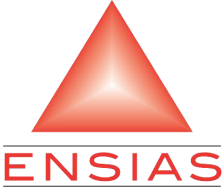



#**Rapport Travaux pratiques DataDriven**

Deuxième année filière Génie Logiciel

École Nationale Supérieure d’Informatique et d’Analyse des Systèmes (ENSIAS)

###Rélisé par:  ETTAOUIL Oussama & BENZHA Marieme

###Professeur : Pr. Youness TABII


Nous allons utiliser des arbres de décision pour analyser un ensemble de données multivarié composé de 14 attributs incluant l'âge, le sexe, et d'autres facteurs cardiovasculaires. Bien que la base de données contienne 76 attributs, seuls 14 sont utilisés dans les études publiées, principalement basées sur la base de données de Cleveland. L'objectif principal est de prédire la présence de maladies cardiaques en se basant sur les caractéristiques des patients, tout en explorant d'autres possibilités diagnostiques dans le but de mieux comprendre le problème.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("heart_disease_uci.csv")
df = df.dropna()
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [ ]:
df.drop(columns=["id"], inplace=True)
df.drop(columns=["dataset"], inplace=True)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [ ]:
# Convert non-numeric values to numeric format
df["sex"].replace({"Male": 1, "Female": 0}, inplace=True)
df["cp"].replace({"typical angina": 0, "atypical angina": 1, "non-anginal": 2, "asymptomatic": 3}, inplace=True)
df["fbs"].replace({True: 1, False: 0}, inplace=True)
df["restecg"].replace({"normal": 0, "lv hypertrophy": 1, "st-t abnormality": 2}, inplace=True)
df["exang"].replace({True: 1, False: 0}, inplace=True)
df["slope"].replace({"upsloping": 0, "flat": 1, "downsloping": 2}, inplace=True)
df["thal"].replace({"normal": 0, "fixed defect": 1, "reversable defect": 2}, inplace=True)

# Display the modified dataset
print(df.head(10))


   age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   0     145.0  233.0    1        1   150.0      0      2.3      2   
1   67    1   3     160.0  286.0    0        1   108.0      1      1.5      1   
2   67    1   3     120.0  229.0    0        1   129.0      1      2.6      1   
3   37    1   2     130.0  250.0    0        0   187.0      0      3.5      2   
4   41    0   1     130.0  204.0    0        1   172.0      0      1.4      0   
5   56    1   1     120.0  236.0    0        0   178.0      0      0.8      0   
6   62    0   3     140.0  268.0    0        1   160.0      0      3.6      2   
7   57    0   3     120.0  354.0    0        0   163.0      1      0.6      0   
8   63    1   3     130.0  254.0    0        1   147.0      0      1.4      1   
9   53    1   3     140.0  203.0    1        1   155.0      1      3.1      2   

    ca  thal  num  
0  0.0     1    0  
1  3.0     0    2  
2  2.0     2    1  
3  0.0     0    0  
4  0.0  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   cp        299 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    int64  
 6   restecg   299 non-null    int64  
 7   thalch    299 non-null    float64
 8   exang     299 non-null    int64  
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      299 non-null    int64  
 13  num       299 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 35.0 KB


In [ ]:
unique_values = df['restecg'].unique()
print(unique_values)

[1 0 2]


In [ ]:
class Node():
    def __init__(self,feature_index = None,threshold = None,left = None,right = None,info_gain = None,value = None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        self.value = value

In [ ]:
class DecisionTreeClassifier():
    def __init__(self,min_samples_split=2,max_depth=2):

        self.root = None

        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"],left_subtree, right_subtree, best_split["info_gain"])

        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):

        best_split = {}
        max_info_gain = -float("inf")

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if curr_info_gain > max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        return best_split

    def split(
            self,
            dataset,
            feature_index,
            threshold
    ):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right

    def information_gain(
            self,
            parent,
            l_child,
            r_child,
            mode = "entropy"

    ):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)

        if mode == "gini":
            gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r * self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child))
        return gain

    def entropy(self,y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(
            self,
            y
    ):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(
            self,
            tree=None,
            indent = " "
    ):

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, 2*indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, 2*indent)

    def fit(self,X,Y):

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self,X):

        predictions = [self.make_prediction(x, self.root)for x in X]
        return predictions

    def make_prediction(self,x,tree):

        if tree.value != None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)


In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=.2, random_state=41)

In [ ]:
X_train

array([[40.,  1.,  3., ...,  1.,  0.,  2.],
       [61.,  1.,  3., ...,  1.,  1.,  2.],
       [63.,  0.,  3., ...,  1.,  2.,  0.],
       ...,
       [66.,  1.,  3., ...,  1.,  0.,  0.],
       [58.,  1.,  3., ...,  0.,  1.,  2.],
       [45.,  1.,  3., ...,  1.,  0.,  0.]])

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train, Y_train)
classifier.print_tree()

X_2 <= 2.0 ? 0.0958546651798472
 left:X_9 <= 2.4 ? 0.03498077959835
  left:X_12 <= 0.0 ? 0.024660933568229626
    left:X_0 <= 56.0 ? 0.015238095238095148
        left:0.0
        right:0.0
    right:X_7 <= 150.0 ? 0.1420191382141442
        left:2.0
        right:0.0
  right:X_3 <= 120.0 ? 0.2186948853615519
    left:4.0
    right:X_10 <= 1.0 ? 0.2775510204081634
        left:1.0
        right:0.0
 right:X_11 <= 0.0 ? 0.06687283176736736
  left:X_12 <= 1.0 ? 0.1179355281207134
    left:X_0 <= 58.0 ? 0.078883572567783
        left:0.0
        right:0.0
    right:X_4 <= 274.0 ? 0.12384259259259245
        left:3.0
        right:2.0
  right:X_0 <= 55.0 ? 0.03978487374595985
    left:X_11 <= 1.0 ? 0.09134978594812393
        left:1.0
        right:3.0
    right:X_10 <= 1.0 ? 0.07008640180878556
        left:2.0
        right:3.0


In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.5666666666666667